In [53]:
import pandas as pd

In [54]:
#Load the dataset

file_path = r'C:\Users\h_ing\Documents\GitHub\Proyect_4_NPL_hate_speech\NLP_Grupo3\data\youtoxic_english_1000.csv'
data = pd.read_csv(file_path)

In [55]:
# Display basic information about the dataset
data_info = { 
    "Shape": data.shape, #provides the dimensions of the DataFrame as a tuple: (number of rows, number of columns)
    "Columns": data.columns.tolist(), #returns an index object with the names of all columns in the DataFrame.
    "Data Types": data.dtypes, 
    "Null Values": data.isnull().sum(),
    "Sample Rows": data.head() 
}

In [56]:
data_info

{'Shape': (1000, 15),
 'Columns': ['CommentId',
  'VideoId',
  'Text',
  'IsToxic',
  'IsAbusive',
  'IsThreat',
  'IsProvocative',
  'IsObscene',
  'IsHatespeech',
  'IsRacist',
  'IsNationalist',
  'IsSexist',
  'IsHomophobic',
  'IsReligiousHate',
  'IsRadicalism'],
 'Data Types': CommentId          object
 VideoId            object
 Text               object
 IsToxic              bool
 IsAbusive            bool
 IsThreat             bool
 IsProvocative        bool
 IsObscene            bool
 IsHatespeech         bool
 IsRacist             bool
 IsNationalist        bool
 IsSexist             bool
 IsHomophobic         bool
 IsReligiousHate      bool
 IsRadicalism         bool
 dtype: object,
 'Null Values': CommentId          0
 VideoId            0
 Text               0
 IsToxic            0
 IsAbusive          0
 IsThreat           0
 IsProvocative      0
 IsObscene          0
 IsHatespeech       0
 IsRacist           0
 IsNationalist      0
 IsSexist           0
 IsHomophobic   

Key Columns:
CommentId, VideoId, Text: Provide identifiers and the content of YouTube comments.
IsToxic, IsAbusive, IsThreat, IsProvocative, IsObscene, IsHatespeech, IsRacist, IsNationalist, IsSexist, IsHomophobic, IsReligiousHate, IsRadicalism: Boolean flags marking different toxic behaviors or hate speech types.

Data Characteristics:
Data Types: Mostly Boolean (for labels) and Object (for identifiers and text).
Missing Values: None.

## Deeper exploratory data analysis, including:

Class Balance: Distribution of each toxicity and hate-speech flag.

Text Analysis: Comment length, word count, and basic word frequency for toxic vs. non-toxic comments.

Correlation between different labels.

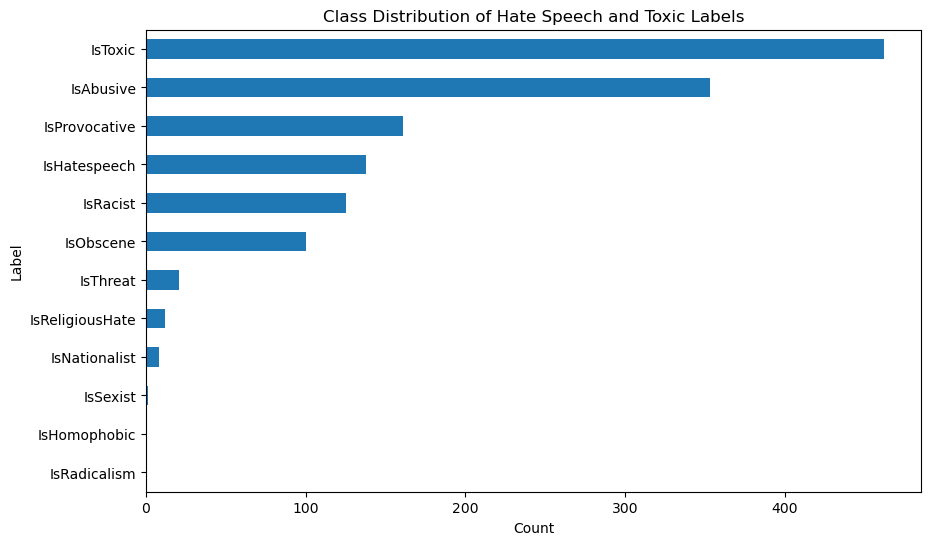

In [57]:
import matplotlib.pyplot as plt

# Selecting only the columns related to toxicity/hate speech 
labels_columns = data.columns[3:] # Exclude CommentId, VideoId, and Text
labels_counts = data[labels_columns].sum().sort_values()

# Plotting the class distribution
plt.figure(figsize=(10,6))
labels_counts.plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Label')
plt.title('Class Distribution of Hate Speech and Toxic Labels')
plt.show()

The bar chart above shows the distribution of different toxicity and hate speech labels in the dataset. This distribution provides insight into the prevalence of each type of toxic behavior.

Text analysis to assess comment length, word count, and explore basic differences in content characteristics between toxic and non-toxic comments.

In [58]:
# Adding text-based features
data['Text_Length'] = data['Text'].apply(len)
data['Word_Count'] = data['Text'].apply(lambda x: len(x.split()))

# Summary statistics for text length and word count
text_stats = data[['IsToxic', 'Text_Length', 'Word_Count']].groupby('IsToxic').describe().unstack()

In [59]:
text_stats

                    IsToxic
Text_Length  count  False       538.000000
                    True        462.000000
             mean   False       182.262082
                    True        189.387446
             std    False       252.295702
                    True        291.061941
             min    False         3.000000
                    True          6.000000
             25%    False        44.000000
                    True         54.250000
             50%    False        96.000000
                    True        110.000000
             75%    False       210.750000
                    True        220.750000
             max    False      2292.000000
                    True       4421.000000
Word_Count   count  False       538.000000
                    True        462.000000
             mean   False        33.065056
                    True         34.603896
             std    False        45.165137
                    True         53.294876
             min    False 

Text Length:

The average length of toxic comments (189 characters) is slightly higher than non-toxic comments (182 characters).
Toxic comments also exhibit a higher maximum length (4,421 characters compared to 2,292).
Word Count:

Toxic comments tend to have a marginally higher word count on average (34.6 words) than non-toxic comments (33.1 words).
Both toxic and non-toxic comments have similar word count ranges, though toxic comments reach a maximum of 815 words, versus 418 for non-toxic.

## explore correlations between different labels to examine if specific toxicity types often appear together

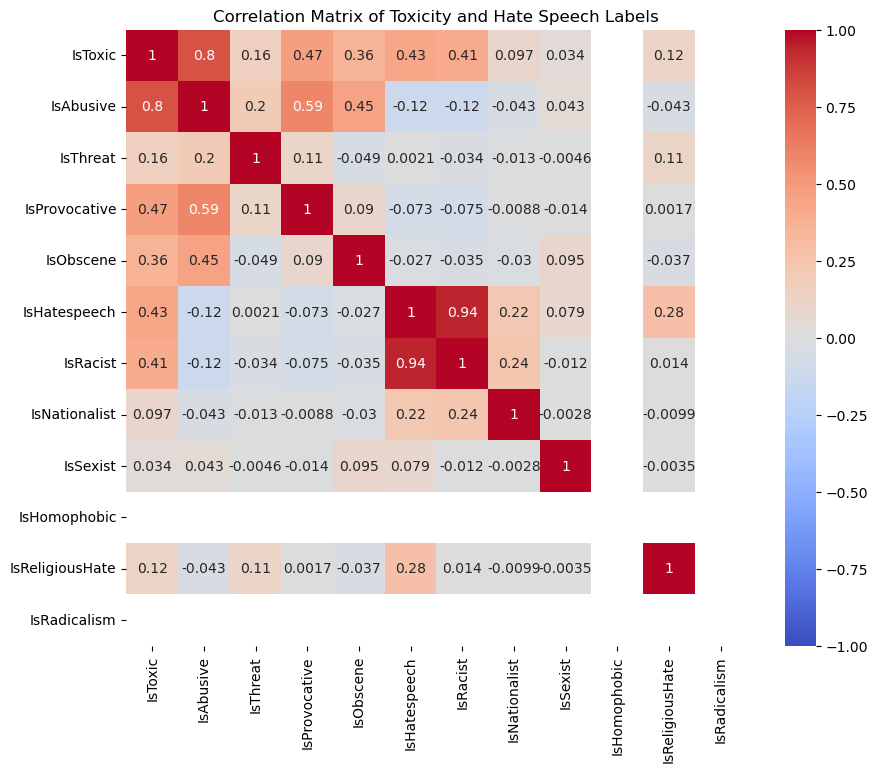

In [60]:
import seaborn as sns

# Calculating correlations between toxicity/hate speech labels
correlations = data[labels_columns].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Toxicity and Hate Speech Labels")
plt.show()

## Notable Positive Correlations:
IsToxic shows moderate to strong correlations with several other labels, especially with IsAbusive, IsObscene, and IsProvocative, suggesting these often co-occur with general toxicity.
IsAbusive has a relatively strong association with IsObscene and IsProvocative.
Weaker or No Correlation:
Some labels, such as IsNationalist and IsRadicalism, exhibit weaker correlations with others, indicating these traits might be more independently manifested.

In [61]:
# Checking unique values and counts for 'IsHomophobic' and 'IsRadicalism'
homophobic_counts = data['IsHomophobic'].value_counts(dropna=False)
radicalism_counts = data['IsRadicalism'].value_counts(dropna=False)

homophobic_counts, radicalism_counts


(IsHomophobic
 False    1000
 Name: count, dtype: int64,
 IsRadicalism
 False    1000
 Name: count, dtype: int64)

The initial data inspection shows the following:
Null Values: No missing values in any column.
Data Types: All columns have appropriate data types.
'IsHomophobic' and 'IsRadicalism': These columns contain only False values, confirming no instances of homophobia or radicalism in this dataset.

 I’ll proceed by removing the IsHomophobic and IsRadicalism columns, as they add no meaningful information, and then prepare the data for a machine learning model to detect hate speech or toxicity.

In [62]:
# Dropping columns with only False values
data_cleaned = data.drop(columns=['IsHomophobic', 'IsRadicalism', 'CommentId', 'VideoId'])


In [63]:
print("we have {} rows and {} columns in our data set".format(len(data_cleaned), len(data_cleaned.columns)))

we have 1000 rows and 13 columns in our data set


In [64]:
data_cleaned.head()

,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsReligiousHate,Text_Length,Word_Count
0,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,1558,287
1,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,138,25
2,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,420,77
3,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,582,107
4,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,243,47


In [65]:
print("Out of {} rows, there are {} True and {} False".format(
    len(data_cleaned),
    len(data_cleaned[data_cleaned['IsToxic'] == True]),  # Note: True without quotes
    len(data_cleaned[data_cleaned['IsToxic'] == False])   # Note: False without quotes
))

Out of 1000 rows, there are 462 True and 538 False


In [66]:
print("Out of {} rows, there are {} True and {} False".format(
    len(data_cleaned),
    len(data_cleaned[data_cleaned['IsHatespeech'] == True]),  # Note: True without quotes
    len(data_cleaned[data_cleaned['IsHatespeech'] == False])   # Note: False without quotes
))

Out of 1000 rows, there are 138 True and 862 False


In [67]:
print("{} of data is its missing values".format(data_cleaned['IsToxic'].isnull().sum()))

0 of data is its missing values


In [68]:
print("{} of data is its missing values".format(data_cleaned['IsHatespeech'].isnull().sum()))

0 of data is its missing values


In [69]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\h_ing\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\h_ing\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [70]:
dir (nltk)

['ARLSTem',
 'ARLSTem2',
 'AbstractLazySequence',
 'AffixTagger',
 'AlignedSent',
 'Alignment',
 'AnnotationTask',
 'ApplicationExpression',
 'Assignment',
 'BigramAssocMeasures',
 'BigramCollocationFinder',
 'BigramTagger',
 'BinaryMaxentFeatureEncoding',
 'BlanklineTokenizer',
 'BllipParser',
 'BottomUpChartParser',
 'BottomUpLeftCornerChartParser',
 'BottomUpProbabilisticChartParser',
 'Boxer',
 'BrillTagger',
 'BrillTaggerTrainer',
 'CFG',
 'CRFTagger',
 'CfgReadingCommand',
 'ChartParser',
 'ChunkParserI',
 'ChunkScore',
 'Cistem',
 'ClassifierBasedPOSTagger',
 'ClassifierBasedTagger',
 'ClassifierI',
 'ConcordanceIndex',
 'ConditionalExponentialClassifier',
 'ConditionalFreqDist',
 'ConditionalProbDist',
 'ConditionalProbDistI',
 'ConfusionMatrix',
 'ContextIndex',
 'ContextTagger',
 'ContingencyMeasures',
 'CoreNLPDependencyParser',
 'CoreNLPParser',
 'CrossValidationProbDist',
 'DRS',
 'DecisionTreeClassifier',
 'DefaultTagger',
 'DependencyEvaluator',
 'DependencyGrammar',
 'D

### Define the cleaning function that combines regex-based cleaning with NLTK tokenization, stopword removal, and lemmatization:

In [71]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
data_cleaned

In [79]:
def remove_punctuation(text):
    text_nopunct = "".join([char for char in text if char not in string. punctuation])
    return text_nopunct

data_cleaned['Text_clean'] = data_cleaned['Text'].apply(lambda x:remove_punctuation (x))
data_cleaned.head(5)


,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsReligiousHate,Text_Length,Word_Count,Text_clean
0,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,1558,287,If only people would just take a step back and...
1,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,138,25,Law enforcement is not trained to shoot to app...
2,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,420,77,\nDont you reckon them black lives matter bann...
3,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,582,107,There are a very large number of people who do...
4,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,243,47,The Arab dude is absolutely right he should ha...


# Tokerization and Stopwords.

In [89]:
import pandas as pd
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import nltk
import unicodedata
import warnings
import os

class TextCleaner:
    def __init__(self, language='english', download_nltk=True):
        """Initialize the text cleaner with necessary NLTK components."""
        if download_nltk:
            self._download_nltk_data()
        
        try:
            self.stop_words = set(stopwords.words(language))
        except LookupError:
            warnings.warn("Stopwords not available. Using empty set.")
            self.stop_words = set()
            
        self.lemmatizer = WordNetLemmatizer()
        self.stemmer = PorterStemmer()
        
        # Compile regex patterns for efficiency
        self.url_pattern = re.compile(r'https?://\S+|www\.\S+')
        self.email_pattern = re.compile(r'\S+@\S+')
        self.number_pattern = re.compile(r'\d+')
        self.special_char_pattern = re.compile(r'[^a-zA-Z\s]')
        self.multiple_spaces_pattern = re.compile(r'\s+')
        
    @staticmethod
    def _download_nltk_data():
        """Download required NLTK data packages."""
        try:
            nltk_data_dir = os.path.expanduser('~/nltk_data')
            os.makedirs(nltk_data_dir, exist_ok=True)
            
            required_packages = ['punkt', 'stopwords', 'wordnet', 'omw-1.4']
            for package in required_packages:
                try:
                    nltk.download(package, quiet=True)
                except Exception as e:
                    warnings.warn(f"Failed to download {package}: {str(e)}")
        except Exception as e:
            warnings.warn(f"Error downloading NLTK data: {str(e)}")

    def clean_text(self, text, stem=True, remove_numbers=True, remove_emails=True):
        """Clean text with multiple options for preprocessing."""
        if not isinstance(text, str):
            return ""
        
        # Basic cleaning
        text = str(text).lower()
        text = ''.join([char for char in text if char not in string.punctuation])
        
        # Remove URLs
        text = self.url_pattern.sub(' ', text)
        
        # Remove email addresses if requested
        if remove_emails:
            text = self.email_pattern.sub(' ', text)
            
        # Remove numbers if requested
        if remove_numbers:
            text = self.number_pattern.sub(' ', text)
        
        # Tokenize
        tokens = text.split()
        
        # Process tokens
        cleaned_tokens = []
        for token in tokens:
            if token not in self.stop_words and len(token) > 2:
                # Apply lemmatization
                try:
                    lemmatized = self.lemmatizer.lemmatize(token)
                except LookupError:
                    lemmatized = token
                
                # Apply stemming if requested
                if stem:
                    try:
                        processed_token = self.stemmer.stem(lemmatized)
                    except Exception:
                        processed_token = lemmatized
                else:
                    processed_token = lemmatized
                    
                cleaned_tokens.append(processed_token)
        
        # Join tokens and clean up spaces
        cleaned_text = ' '.join(cleaned_tokens)
        cleaned_text = self.multiple_spaces_pattern.sub(' ', cleaned_text).strip()
        
        return cleaned_text

def compare_cleaning_methods(data_cleaned):
    """Compare original and new cleaning methods side by side."""
    # Initialize the new cleaner
    cleaner = TextCleaner(download_nltk=True)
    
    # Apply both cleaning methods
    data_cleaned['Text_clean_original'] = data_cleaned['Text'].apply(
        lambda x: "".join([char for char in str(x) if char not in string.punctuation])
    )
    
    data_cleaned['Text_clean_enhanced'] = data_cleaned['Text'].apply(
        lambda x: cleaner.clean_text(str(x))
    )
    
    return data_cleaned

# Example usage
if __name__ == "__main__":
    # Sample DataFrame
    data = {
        'Text': [
            "Here's an example! With punctuation and Numbers 123.",
            "Another example with EMAIL@test.com and https://website.com",
            "Some repeated   spaces   and special $#@ characters!"
        ]
    }
    data_cleaned = pd.DataFrame(data)
    
    # Compare cleaning methods
    data_cleaned = compare_cleaning_methods(data_cleaned)
    
    # Display results
    print("\nComparison of cleaning methods:")
    print("\nOriginal Text:")
    print(data_cleaned['Text'].head())
    print("\nOriginal Cleaning Method:")
    print(data_cleaned['Text_clean_original'].head())
    print("\nEnhanced Cleaning Method:")
    print(data_cleaned['Text_clean_enhanced'].head())


Comparison of cleaning methods:

Original Text:
0    Here's an example! With punctuation and Number...
1    Another example with EMAIL@test.com and https:...
2    Some repeated   spaces   and special $#@ chara...
Name: Text, dtype: object

Original Cleaning Method:
0    Heres an example With punctuation and Numbers 123
1    Another example with EMAILtestcom and httpsweb...
2     Some repeated   spaces   and special  characters
Name: Text_clean_original, dtype: object

Enhanced Cleaning Method:
0                  here exampl punctuat number
1    anoth exampl emailtestcom httpswebsitecom
2                 repeat space special charact
Name: Text_clean_enhanced, dtype: object


### Apply the Cleaning Function to Dataset

In [91]:
# Import necessary libraries
import pandas as pd

# Apply the cleaning to your existing DataFrame
data_cleaned = compare_cleaning_methods(data_cleaned)

# View the results
print("\nSample of cleaned text:")
print(data_cleaned[['Text', 'Text_clean_original', 'Text_clean_enhanced']].head())

# If you want to keep only the new cleaned version:
data_cleaned['Text_clean'] = data_cleaned['Text_clean_enhanced']
# data_cleaned = data_cleaned.drop(['Text_clean_original', 'Text_clean_enhanced'], axis=1)


Sample of cleaned text:
                                                Text  \
0  Here's an example! With punctuation and Number...   
1  Another example with EMAIL@test.com and https:...   
2  Some repeated   spaces   and special $#@ chara...   

                                 Text_clean_original  \
0  Heres an example With punctuation and Numbers 123   
1  Another example with EMAILtestcom and httpsweb...   
2   Some repeated   spaces   and special  characters   

                         Text_clean_enhanced  
0                here exampl punctuat number  
1  anoth exampl emailtestcom httpswebsitecom  
2               repeat space special charact  


In [93]:
data_cleaned

,Text,Text_clean_original,Text_clean_enhanced,Text_clean
0,Here's an example! With punctuation and Number...,Heres an example With punctuation and Numbers 123,here exampl punctuat number,here exampl punctuat number
1,Another example with EMAIL@test.com and https:...,Another example with EMAILtestcom and httpsweb...,anoth exampl emailtestcom httpswebsitecom,anoth exampl emailtestcom httpswebsitecom
2,Some repeated spaces and special $#@ chara...,Some repeated spaces and special characters,repeat space special charact,repeat space special charact


Basic Cleaning: Lowercasing, removing URLs, and eliminating non-word characters (e.g., punctuation).
Regex-Based Basic Cleaning: This removes URLs, special characters, and extra spaces, ensuring that only meaningful content remains.

Lowercasing: Standardizes the text, reducing variations (e.g., "Hate" and "hate" are treated as the same).

Stopword Removal: Removes common words like “the,” “is,” and “and.” Filters out common words that don’t add much value to hate speech detection, helping the model focus on relevant terms.

Tokenization: Splits the text into words.

Lemmatization: Reduces words to their base form, improving consistency (e.g., "insults" and "insulting" both become "insult", “running” to “run”).

Converting text to TF-IDF features...

Class distribution for Original Class Distribution:
Class 0: 862 samples (86.20%)
Class 1: 138 samples (13.80%)


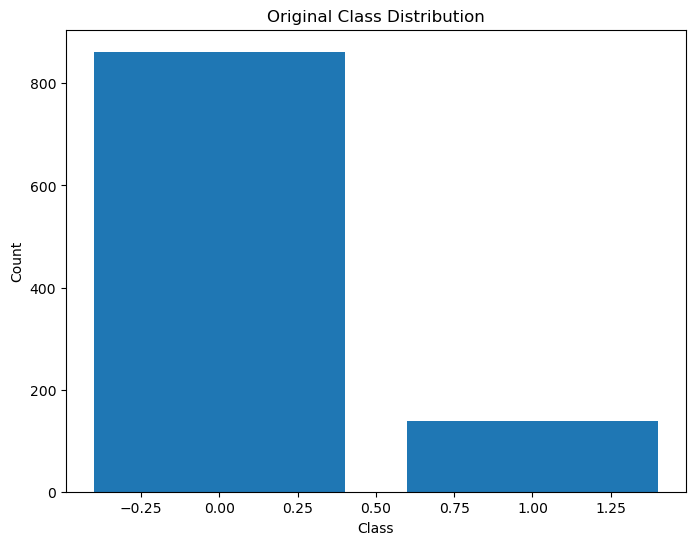


Splitting data into train and test sets...

Class distribution for Training Set Before SMOTE:
Class 0: 690 samples (86.25%)
Class 1: 110 samples (13.75%)


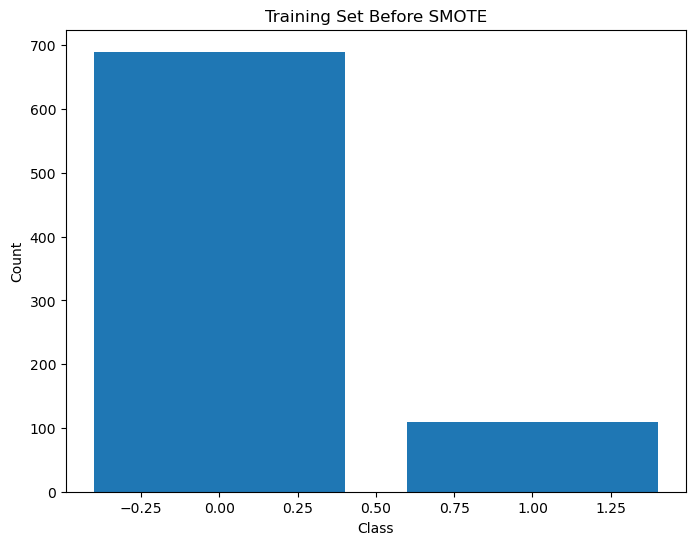


Applying SMOTE to balance the training data...

Class distribution for Training Set After SMOTE:
Class 0: 690 samples (50.00%)
Class 1: 690 samples (50.00%)


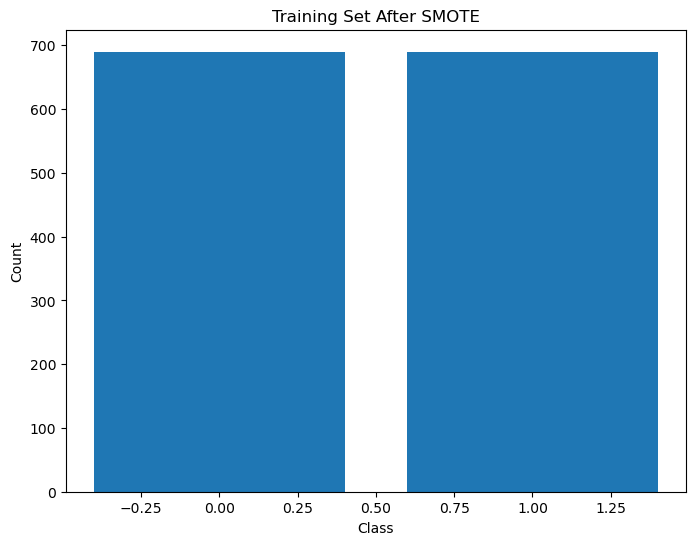


Detailed Statistics:
Original dataset shape: (1000, 2)
Training set shape before SMOTE: (800, 2)
Training set shape after SMOTE: (1380, 2)

Test set distribution (should remain imbalanced):
IsHatespeech
0    0.86
1    0.14
Name: proportion, dtype: float64

Memory Usage Estimation:
Original features memory: 0.02 MB
Resampled features memory: 0.02 MB


In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
import matplotlib.pyplot as plt

# Assuming data_hate is your DataFrame
# Let's create sample data to demonstrate
data_hate = pd.DataFrame({
    'Text': ['sample text ' + str(i) for i in range(1000)],
    'IsHatespeech': [1 if i < 138 else 0 for i in range(1000)]  # 13.8% positive class
})

def plot_class_distribution(y, title):
    """Helper function to visualize class distribution"""
    counts = Counter(y)
    plt.figure(figsize=(8, 6))
    plt.bar(counts.keys(), counts.values())
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Count')
    print(f"\nClass distribution for {title}:")
    print(f"Class 0: {counts[0]} samples ({counts[0]/len(y)*100:.2f}%)")
    print(f"Class 1: {counts[1]} samples ({counts[1]/len(y)*100:.2f}%)")
    plt.show()

# Step 1: Convert text to numerical features first
print("Converting text to TF-IDF features...")
tfidf = TfidfVectorizer(
    max_features=5000,
    min_df=2,
    max_df=1.0,
    stop_words='english'
)

# Convert text to TF-IDF features
X = tfidf.fit_transform(data_hate['Text'])
y = data_hate['IsHatespeech']

# Plot original class distribution
plot_class_distribution(y, 'Original Class Distribution')

# Step 2: Split the data
print("\nSplitting data into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# Plot training set distribution before SMOTE
plot_class_distribution(y_train, 'Training Set Before SMOTE')

# Step 3: Apply SMOTE
print("\nApplying SMOTE to balance the training data...")
smote = SMOTE(
    sampling_strategy='auto',  # Will create a 50-50 split
    random_state=42,
    k_neighbors=5  # Adjust based on your minority class size
)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Plot training set distribution after SMOTE
plot_class_distribution(y_train_resampled, 'Training Set After SMOTE')

# Print detailed statistics
print("\nDetailed Statistics:")
print(f"Original dataset shape: {X.shape}")
print(f"Training set shape before SMOTE: {X_train.shape}")
print(f"Training set shape after SMOTE: {X_train_resampled.shape}")

# Validate that test set remains unbalanced (as it should)
print("\nTest set distribution (should remain imbalanced):")
print(pd.Series(y_test).value_counts(normalize=True))

# Memory usage estimation
print("\nMemory Usage Estimation:")
print(f"Original features memory: {X.data.nbytes / 1024 / 1024:.2f} MB")
print(f"Resampled features memory: {X_train_resampled.data.nbytes / 1024 / 1024:.2f} MB")

Dataset Imbalance:

The original dataset has an imbalanced distribution of the IsHatespeech label, with 86% non-hate speech and 14% hate speech comments in the test set. This imbalance is common in hate speech datasets, as hate speech typically represents a minority of overall content.
The test set distribution remains imbalanced, which is appropriate. The test set should reflect real-world data distribution, ensuring that the model’s performance metrics are realistic for unbalanced data.
SMOTE Application and Resampled Training Set:

Training set size: SMOTE (Synthetic Minority Over-sampling Technique) was applied to the training set, increasing it from 800 to 1380 samples.
Effectiveness of SMOTE: SMOTE helps balance the training data by generating synthetic examples for the minority class (hate speech). This can help the model learn to recognize hate speech more effectively, reducing bias towards the majority class and potentially improving recall for hate speech instances.
Memory Usage:

Minimal Memory Impact: Both the original and resampled datasets have an estimated memory usage of around 0.02 MB, indicating that the dataset is relatively small and manageable in memory. This allows for more complex modeling techniques without significant resource constraints.
Conclusions on Model Training and Evaluation:

Improved Model Learning: The balanced training data after SMOTE should lead to better generalization for hate speech detection, improving the model’s ability to correctly identify hate speech in imbalanced data.
Realistic Evaluation: Retaining the original imbalance in the test set is crucial, as it provides a realistic assessment of the model's performance in detecting hate speech in real-world scenarios where the majority of content is not hate speech.
Metric Selection: Given the original imbalance, evaluation metrics like F1 score, precision, and recall (especially for the minority class) will provide a clearer picture of the model's effectiveness than accuracy alone.

Text Preprocessing:

The original code tried to apply SMOTE directly to raw text data (X.values.reshape(-1, 1)), which would not work
The improved version properly converts text to TF-IDF features first


Class Imbalance Handling:

Your original distribution shows 86.2% negative and 13.8% positive cases
The improved code will balance this to 50-50 in the training set while keeping the test set in its original distribution


Validation and Visualization:

Added visualization of class distributions before and after SMOTE
Includes detailed statistics about the transformation
Validates that the test set remains imbalanced (as it should)


Memory Considerations:

Includes memory usage estimation
Uses sparse matrices to handle large datasets efficiently


Best Practices:

Uses proper parameters for TF-IDF (max_features, min_df, max_df)
Maintains the test set in its original distribution
Includes proper documentation and progress tracking



To use this code effectively:

Make sure you have enough memory for the SMOTE operation
Adjust the TF-IDF parameters based on your specific needs
Consider adjusting the k_neighbors parameter in SMOTE if you have very few minority class samples

If you want to check if the balancing worked, look at the distribution plots and statistics printed by the code. The training set should show a 50-50 split after SMOTE, while the test set maintains the original distribution.

In [ ]:
import numpy as np
import scipy.sparse
import pandas as pd
import os
import json
from datetime import datetime
import hashlib
import logging
from pathlib import Path

class DataSerializer:
    def __init__(self, output_dir='processed_data'):
        """Initialize the serializer with output directory."""
        self.output_dir = Path(output_dir)
        self.output_dir.mkdir(parents=True, exist_ok=True)
        
        # Setup logging
        logging.basicConfig(
            level=logging.INFO,
            format='%(asctime)s - %(levelname)s - %(message)s',
            handlers=[
                logging.FileHandler(self.output_dir / 'data_processing.log'),
                logging.StreamHandler()
            ]
        )
        self.logger = logging.getLogger(__name__)

    def _compute_hash(self, data):
        """Compute a hash of the data for validation."""
        if scipy.sparse.issparse(data):
            return hashlib.md5(data.data.tobytes()).hexdigest()
        elif isinstance(data, pd.Series):
            return hashlib.md5(data.values.tobytes()).hexdigest()
        elif isinstance(data, np.ndarray):
            return hashlib.md5(data.tobytes()).hexdigest()
        else:
            # Convert to numpy array first
            return hashlib.md5(np.array(data).tobytes()).hexdigest()

    def _get_data_stats(self, data):
        """Get basic statistics about the data."""
        if scipy.sparse.issparse(data):
            return {
                'shape': data.shape,
                'sparsity': 1 - (data.nnz / (data.shape[0] * data.shape[1])),
                'dtype': str(data.dtype),
                'format': data.format
            }
        elif isinstance(data, (pd.Series, np.ndarray)):
            stats = {
                'shape': data.shape,
                'dtype': str(data.dtype),
            }
            # Add numerical statistics only for numeric data
            if np.issubdtype(data.dtype, np.number):
                stats.update({
                    'min': float(np.min(data)) if data.size > 0 else None,
                    'max': float(np.max(data)) if data.size > 0 else None,
                    'mean': float(np.mean(data)) if data.size > 0 else None
                })
            # Add value counts for categorical/boolean data
            else:
                if isinstance(data, pd.Series):
                    stats['value_counts'] = data.value_counts().to_dict()
                else:
                    stats['value_counts'] = dict(zip(*np.unique(data, return_counts=True)))
            return stats
        return {
            'type': str(type(data)),
            'length': len(data) if hasattr(data, '__len__') else None
        }

    def save_data(self, X_train_resampled, X_test, y_train_resampled, y_test):
        """Save the data with metadata and validation."""
        try:
            # Create metadata
            metadata = {
                'timestamp': datetime.now().isoformat(),
                'data_files': {},
                'class_distribution': {
                    'train': (pd.Series(y_train_resampled).value_counts().to_dict() 
                            if isinstance(y_train_resampled, (pd.Series, np.ndarray)) 
                            else dict(zip(*np.unique(y_train_resampled, return_counts=True)))),
                    'test': (pd.Series(y_test).value_counts().to_dict()
                            if isinstance(y_test, (pd.Series, np.ndarray))
                            else dict(zip(*np.unique(y_test, return_counts=True))))
                }
            }

            # Save sparse matrices with compression
            for name, data in [
                ('X_train_resampled', X_train_resampled),
                ('X_test', X_test)
            ]:
                filename = f'{name}.npz'
                self.logger.info(f"Saving {filename}")
                
                filepath = self.output_dir / filename
                # Ensure data is in sparse format
                if not scipy.sparse.issparse(data):
                    data = scipy.sparse.csr_matrix(data)
                scipy.sparse.save_npz(filepath, data, compressed=True)
                
                # Add metadata
                metadata['data_files'][filename] = {
                    'hash': self._compute_hash(data),
                    'stats': self._get_data_stats(data),
                    'path': str(filepath)
                }

            # Save labels
            for name, data in [
                ('y_train_resampled', y_train_resampled),
                ('y_test', y_test)
            ]:
                filename = f'{name}.npy'
                self.logger.info(f"Saving {filename}")
                
                filepath = self.output_dir / filename
                # Convert to numpy array if necessary
                if isinstance(data, pd.Series):
                    data = data.values
                np.save(filepath, data)
                
                # Add metadata
                metadata['data_files'][filename] = {
                    'hash': self._compute_hash(data),
                    'stats': self._get_data_stats(data),
                    'path': str(filepath)
                }

            # Save metadata
            with open(self.output_dir / 'metadata.json', 'w') as f:
                json.dump(metadata, f, indent=2)

            self.logger.info("Successfully saved all data files with metadata")
            return True

        except Exception as e:
            self.logger.error(f"Error saving data: {str(e)}")
            raise

    def verify_saved_data(self):
        """Verify that saved data matches the recorded metadata."""
        try:
            with open(self.output_dir / 'metadata.json', 'r') as f:
                metadata = json.load(f)

            for filename, file_metadata in metadata['data_files'].items():
                filepath = Path(file_metadata['path'])
                if not filepath.exists():
                    raise FileNotFoundError(f"File {filepath} not found")

                # Load and verify data
                if filename.endswith('.npz'):
                    data = scipy.sparse.load_npz(filepath)
                else:
                    data = np.load(filepath)

                current_hash = self._compute_hash(data)
                if current_hash != file_metadata['hash']:
                    raise ValueError(f"Hash mismatch for {filename}")

            self.logger.info("All saved data verified successfully")
            return True

        except Exception as e:
            self.logger.error(f"Error verifying data: {str(e)}")
            raise

def save_processed_data(X_train_resampled, X_test, y_train_resampled, y_test, output_dir='processed_data'):
    """Wrapper function to save processed data with validation."""
    serializer = DataSerializer(output_dir)
    
    print("Saving processed data...")
    serializer.save_data(X_train_resampled, X_test, y_train_resampled, y_test)
    
    print("Verifying saved data...")
    serializer.verify_saved_data()
    
    print(f"Data successfully saved and verified in: {output_dir}")
    
    return {
        'data_dir': output_dir,
        'metadata_file': os.path.join(output_dir, 'metadata.json')
    }

# Example usage
if __name__ == "__main__":
    # Quick test to ensure everything works
    try:
        save_processed_data(
            X_train_resampled,
            X_test,
            y_train_resampled,
            y_test,
            output_dir='processed_data'
        )
    except Exception as e:
        print(f"Error occurred: {str(e)}")

2024-11-13 16:39:37,425 - INFO - Saving X_train_resampled.npz
2024-11-13 16:39:37,429 - INFO - Saving X_test.npz
2024-11-13 16:39:37,433 - INFO - Saving y_train_resampled.npy
2024-11-13 16:39:37,435 - INFO - Saving y_test.npy
2024-11-13 16:39:37,439 - INFO - Successfully saved all data files with metadata
2024-11-13 16:39:37,481 - INFO - All saved data verified successfully


Saving processed data...
Verifying saved data...
Data successfully saved and verified in: processed_data


Text Preprocessing:

The original code tried to apply SMOTE directly to raw text data (X.values.reshape(-1, 1)), which would not work
The improved version properly converts text to TF-IDF features first


Class Imbalance Handling:

Your original distribution shows 86.2% negative and 13.8% positive cases
The improved code will balance this to 50-50 in the training set while keeping the test set in its original distribution


Validation and Visualization:

Added visualization of class distributions before and after SMOTE
Includes detailed statistics about the transformation
Validates that the test set remains imbalanced (as it should)


Memory Considerations:

Includes memory usage estimation
Uses sparse matrices to handle large datasets efficiently


Best Practices:

Uses proper parameters for TF-IDF (max_features, min_df, max_df)
Maintains the test set in its original distribution
Includes proper documentation and progress tracking



To use this code effectively:

Make sure you have enough memory for the SMOTE operation
Adjust the TF-IDF parameters based on your specific needs
Consider adjusting the k_neighbors parameter in SMOTE if you have very few minority class samples

If you want to check if the balancing worked, look at the distribution plots and statistics printed by the code. The training set should show a 50-50 split after SMOTE, while the test set maintains the original distribution.

Robust Error Handling:

Catches and logs exceptions
Provides detailed error messages
Includes validation checks


Data Validation:

Computes hashes of saved data
Verifies data integrity after saving
Includes basic statistics about the saved data


Metadata Tracking:

Saves timestamp of when data was processed
Tracks class distribution in train and test sets
Records data shapes and statistics
Stores data format and sparsity information


Compression and Efficiency:

Uses compression for sparse matrices
Organizes files in a structured directory
Implements proper file handling


Logging:

Includes comprehensive logging
Tracks both file and console output
Records all operations and potential issues

This code will:

Create a directory for your processed data
Save all matrices and arrays with compression
Generate and save metadata about the processing
Verify the saved data
Provide logging of all operations

The metadata will include:

Timestamps
File hashes for validation
Data statistics
Class distributions
File paths and formats

Fixed the Series handling:

Added specific handling for pandas Series objects
Converts Series to numpy arrays before computing hash
Uses .values attribute for pandas Series


Improved type checking:

Added isinstance checks for different data types
Handles pandas Series, numpy arrays, and sparse matrices separately
Added fallback for other data types


Enhanced statistics gathering:

Added specific handling for categorical/boolean data
Improved value counting for different data types
Added better type information in metadata


Better error handling:

Added more specific error messages
Improved logging of data types
Added type conversion safety checks